# Clasificación de Radiografías de Pulmones con Deep Learning  

##  Introducción  
Las enfermedades pulmonares, como el **COVID-19**, la **neumonía viral** y la **neumonía bacteriana**, representan un gran desafío en la medicina, ya que su diagnóstico temprano es clave para un tratamiento efectivo. Actualmente, los métodos tradicionales de diagnóstico dependen de la interpretación de radiografías por radiólogos expertos, lo que puede ser un proceso **lento, costoso y sujeto a error humano**.

El avance de la **Visión por Computador** y el **Deep Learning** ha abierto nuevas oportunidades para **automatizar y mejorar la detección de enfermedades pulmonares** a través del análisis de imágenes médicas. En este proyecto, exploramos cómo dos redes neuronal preentrenadas (**ResNet50 e Inception-ResNetV2**) puede ser utilizada para **clasificar radiografías de tórax** en cuatro categorías:  

- **Normal (Pulmón Sano)**  
- **COVID-19**  
- **Neumonía Viral**  
- **Neumonía Bacteriana**  

---

##  **Objetivo del Proyecto**  
El propósito de este trabajo es desarrollar un **modelo de clasificación de imágenes médicas** basado en Deep Learning, capaz de distinguir entre diferentes afecciones pulmonares con alta precisión. Para lograrlo, utilizaremos **Transfer Learning con ResNet50 e Inception-ResNetV2**, optimizando el modelo y evaluando su desempeño en un conjunto de datos de rayos X.

**Los objetivos específicos incluyen:**  
- Aplicar **Transfer Learning** con **ResNet50 e Inception-ResNetV2** para el análisis de imágenes médicas.  
- Evaluar y mejorar el rendimiento del modelo con técnicas de **regularización y ajuste de hiperparámetros**.  
- Implementar estrategias de **Data Augmentation** para mejorar la capacidad de generalización del modelo.  
- Analizar la interpretabilidad del modelo mediante **Grad-CAM** para visualizar qué regiones de la imagen son relevantes en la predicción.  

---

##  **Relevancia del Proyecto**  
1 **Reducción de Errores Humanos**: Un sistema basado en IA puede ayudar a reducir diagnósticos erróneos o inconsistentes.  
2 **Diagnóstico más rápido y accesible**: En hospitales con escasez de radiólogos, un modelo automático puede acelerar el proceso de diagnóstico.  
3 **Escalabilidad y aplicación en telemedicina**: Este tipo de tecnología podría integrarse en **hospitales, clínicas móviles y aplicaciones de telemedicina** para facilitar diagnósticos remotos.  
4 **Impacto social y académico**: La inteligencia artificial aplicada a la salud es un campo en auge, con un gran potencial de investigación y desarrollo.  

---

##  **Metodología**  
Para llevar a cabo este estudio, utilizaremos el siguiente enfoque:  
1 **Preprocesamiento de datos**: Carga y limpieza del dataset, normalización de imágenes y generación de datos sintéticos con **Data Augmentation**.  
2 **Entrenamiento del modelo**: Implementación de **ResNet50**, ajuste de hiperparámetros y experimentación con capas adicionales, comparar su desempeño con **Inception-ResNetV2**.  
3 **Evaluación del desempeño**: Análisis de métricas clave como **accuracy, precision, recall y matriz de confusión**.  
4 **Optimización**: Reducción del sobreajuste mediante regularización, Dropout y ajuste de tasas de aprendizaje.  
5 **Interpretabilidad del modelo**: Uso de **Grad-CAM** para visualizar las regiones más relevantes en las predicciones.  

---

##  **Estructura del Notebook**  
El proyecto se dividirá en las siguientes secciones:  
1 **Carga y exploración del dataset**  
2 **Preprocesamiento y Data Augmentation**  
3 **Implementación del modelo con ResNet50 e Inception-ResNetV2**  
4 **Entrenamiento y ajuste de hiperparámetros**  
5 **Evaluación del modelo**  
6 **Análisis de interpretabilidad con Grad-CAM**  
7 **Conclusiones y posibles mejoras**  

 **Este enfoque garantizará que el modelo no solo sea preciso, sino también interpretable y aplicable en entornos médicos reales.**

# 0. Importación de las librerías necesarias

In [1]:
# Importamos las librerías necesarias
import os
import shutil
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

# 1. Carga y Exploración del Dataset

## Creación de un Dataset Custom  

### Introducción  
En este proyecto, **no existe un dataset público que clasifique radiografías de tórax en las cuatro categorías específicas** que necesitamos:  
- **Sano (NORMAL)**
- **COVID-19**
- **Neumonía Bacteriana**
- **Neumonía Viral**  

Por esta razón, fue **necesario construir un dataset custom**, combinando imágenes de diferentes fuentes y reorganizándolas específicamente para este estudio.

### Fuentes de Datos  
Para lograr esto, recopilamos imágenes de **dos datasets diferentes**:

1. **Kaggle - Chest X-Ray Pneumonia**  
   - Contiene imágenes de **pacientes sanos y con neumonía**, pero **no distingue entre neumonía viral y bacteriana**.  
   - Fue necesario **separar** estas imágenes en dos grupos según la etiología de la enfermedad.

2. **GitHub - COVID Chest X-Ray Dataset**  
   - Contiene imágenes de **pacientes con COVID-19**.  
   - Se realizó un proceso de **filtrado** para seleccionar solo las radiografías de tórax relevantes.

### Construcción del Dataset  
Dado que ninguna fuente tenía los datos completamente organizados para nuestro objetivo, realizamos los siguientes pasos:  
- **Recopilación y preprocesamiento** de imágenes de ambas fuentes.  
- **Separación de las categorías de neumonía** en bacteriana y viral.  
- **Estructuración de un dataset final** optimizado para entrenamiento de modelos de visión por computadora.  

### Importancia del Dataset Custom  
Este dataset es **único y diseñado específicamente** para este proyecto. Gracias a la combinación de múltiples fuentes y su reorganización, nos aseguramos de que el modelo pueda aprender a **distinguir correctamente entre las cuatro categorías**, lo que no sería posible con un dataset público estándar.

**Este proceso resalta la importancia de una correcta preparación de datos en problemas de Machine Learning, asegurando una base de datos representativa y bien estructurada para entrenar modelos de clasificación de imágenes médicas.**

In [2]:
# Montamos el Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir la ruta base en Google Drive
base_path = "/content/drive/My Drive/TFM"

# Listar archivos y carpetas en la ruta
print("Contenido en TFM:", os.listdir(base_path))

Contenido en TFM: ['Kaggle_Chest_Xray', 'GitHub_Chest_Xray', 'TFM_JP.ipynb']


In [ ]:
# Definir las rutas de las carpetas
kaggle_path = os.path.join(base_path, "Kaggle_Chest_Xray")
github_path = os.path.join(base_path, "GitHub_Chest_Xray")

# Listar archivos y carpetas en Kaggle
print("Contenido en Kaggle_Chest_Xray:", os.listdir(kaggle_path))

# Listar archivos y carpetas en GitHub
print("Contenido en GitHub_Chest_Xray:", os.listdir(github_path))

Contenido en Kaggle_Chest_Xray: ['test', 'train', 'val']
Contenido en GitHub_Chest_Xray: ['metadata.csv', 'images']


Dado que el dataset de Github contiene la información sobre cuáles de las imágenes corresponden a COVID19, vamos a analizarlo.

In [ ]:
# Ruta del archivo metadata.csv
metadata_path = os.path.join(github_path, "metadata.csv")

# Cargar el archivo CSV
df_metadata = pd.read_csv(metadata_path)

# Mostrar las primeras filas
df_metadata.head()

patientid  offset sex   age                   finding RT_PCR_positive  \
0         2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
4  Changhua Christian Hospital, Changhua City, Ta...  images   

                                            filename                   doi  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...  10.1056/nejmc2001272   
4                              nejmc2001573_f1a.jpeg  10.1056/NEJMc2001573   

                                                 url  license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...      NaN   

                                      clinical_notes other_notes Unnamed: 29  
0  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
1  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
2  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
3  On January 22, 2020, a 65-year-old man with a ...         NaN         NaN  
4   diffuse infiltrates in the bilateral lower lungs         NaN         NaN  

[5 rows x 30 columns]

Vemos que efectivamente, el archivo metadata.csv contiene información sobre cuáles imágenes corresponden a pacientes de Covid19, dado que estas imágenes serán nuestros datos para la categoría COVID19, pasamos estas imágenes al dataset final pero **observamos algo importante, dado que las imágenes están mezcladas entre radiografías y CT scans, y juntarlas sería perjudicial para el modelo, vamos a primero verificar si en el archivo de metadata están etiquetadas de manera diferenciada**

In [ ]:
# Ver las columnas disponibles en el dataset
print("Columnas del archivo metadata.csv:")
print(df_metadata.columns)

# Ver los valores únicos en la columna que indica el tipo de imagen
column_name = "modality"  # Posible columna donde se especifica el tipo de imagen
if column_name in df_metadata.columns:
    print("\nTipos de imágenes en el dataset:")
    print(df_metadata[column_name].value_counts())
else:
    print("\nNo se encontró una columna específica para el tipo de imagen. Revisa el archivo manualmente.")

Columnas del archivo metadata.csv:
Index(['patientid', 'offset', 'sex', 'age', 'finding', 'RT_PCR_positive',
       'survival', 'intubated', 'intubation_present', 'went_icu', 'in_icu',
       'needed_supplemental_O2', 'extubated', 'temperature', 'pO2_saturation',
       'leukocyte_count', 'neutrophil_count', 'lymphocyte_count', 'view',
       'modality', 'date', 'location', 'folder', 'filename', 'doi', 'url',
       'license', 'clinical_notes', 'other_notes', 'Unnamed: 29'],
      dtype='object')

Tipos de imágenes en el dataset:
modality
X-ray    866
CT        84
Name: count, dtype: int64


Efectivamente, los datos están categorizados en CT y X-ray entonces para el Dataset Final utilizaremos solamente las radiografías de pacientes con COVID19

In [ ]:
# Definir rutas
base_path = "/content/drive/My Drive/TFM/GitHub_Chest_Xray"
images_path = os.path.join(base_path, "images")
output_path = os.path.join(base_path, "Xray_Only")

# Crear carpeta destino si no existe
os.makedirs(output_path, exist_ok=True)

# Cargar metadata
metadata_path = os.path.join(base_path, "metadata.csv")
df_metadata = pd.read_csv(metadata_path)

# Filtrar solo imágenes de rayos X
df_xray = df_metadata[df_metadata["modality"] == "X-ray"]

# Copiar solo las imágenes de rayos X a la nueva carpeta
for filename in df_xray["filename"]:
    src = os.path.join(images_path, filename)
    dst = os.path.join(output_path, filename)

    if os.path.exists(src):  # Verificar que la imagen existe antes de copiar
        shutil.copy(src, dst)

print(f"✅ Se copiaron {len(df_xray)} imágenes de rayos X a '{output_path}'.")


✅ Se copiaron 866 imágenes de rayos X a '/content/drive/My Drive/TFM/GitHub_Chest_Xray/Xray_Only'.


Podemos observar que efectivamente ya se copiaron a otra carpeta solamente las imágenes que corresponden a rayos x pero están mezcladas todas las infecciones, ahora vamos solamente a filtrar las que corresponden a pacientes de covid19

In [ ]:
# Definir rutas
covid_output_path = os.path.join(base_path, "Xray_COVID_Only")
os.makedirs(covid_output_path, exist_ok=True)

# Filtrar solo imágenes con diagnóstico de COVID-19
df_covid_xray = df_xray[df_xray["finding"].str.contains("COVID", na=False, case=False)]

# Copiar solo las imágenes con COVID-19
for filename in df_covid_xray["filename"]:
    src = os.path.join(output_path, filename)
    dst = os.path.join(covid_output_path, filename)

    if os.path.exists(src):  # Verificar que la imagen existe antes de copiar
        shutil.copy(src, dst)

print(f"✅ Se copiaron {len(df_covid_xray)} imágenes de rayos X con COVID-19 a '{covid_output_path}'.")

✅ Se copiaron 504 imágenes de rayos X con COVID-19 a '/content/drive/My Drive/TFM/GitHub_Chest_Xray/Xray_COVID_Only'.


Ya está todo listo con el Dataset de GitHub que nos servirá de casos positivos de COVID 19, ahora tenemos que trabajar con el Dataset de Kaggle que está organizado en Train, Test y Val y dentro de cada carpeta hay 2, NORMAL y PNEUMONIA pero dentro de PNEUMONIA están mezcladas las imágenes en viral y bacteriana por lo que  debemos separarlas adecuadamente.

In [ ]:
# Definir la ruta base en Google Drive
base_path = "/content/drive/My Drive/TFM/Kaggle_Chest_Xray"

# Listado de carpetas de train, test y val
splits = ["train", "test", "val"]

# Iterar sobre cada split para organizar las imágenes
for split in splits:
    pneumonia_path = os.path.join(base_path, split, "PNEUMONIA")
    bacterial_path = os.path.join(base_path, split, "BACTERIAL")
    viral_path = os.path.join(base_path, split, "VIRAL")

    # Crear las carpetas de destino si no existen
    os.makedirs(bacterial_path, exist_ok=True)
    os.makedirs(viral_path, exist_ok=True)

    # Mover las imágenes de PNEUMONIA a las carpetas correspondientes
    for filename in os.listdir(pneumonia_path):
        file_path = os.path.join(pneumonia_path, filename)

        if "_bacteria" in filename:
            shutil.move(file_path, os.path.join(bacterial_path, filename))
        elif "_virus" in filename:
            shutil.move(file_path, os.path.join(viral_path, filename))

    print(f"📂 Se organizaron las imágenes en {split}:")
    print(f"- {len(os.listdir(bacterial_path))} imágenes en BACTERIAL")
    print(f"- {len(os.listdir(viral_path))} imágenes en VIRAL")

# Eliminar la carpeta "PNEUMONIA" vacía
for split in splits:
    pneumonia_path = os.path.join(base_path, split, "PNEUMONIA")
    if os.path.exists(pneumonia_path) and not os.listdir(pneumonia_path):
        os.rmdir(pneumonia_path)

print("✅ Organización del dataset completada.")


📂 Se organizaron las imágenes en train:
- 2530 imágenes en BACTERIAL
- 1345 imágenes en VIRAL
📂 Se organizaron las imágenes en test:
- 242 imágenes en BACTERIAL
- 148 imágenes en VIRAL
📂 Se organizaron las imágenes en val:
- 8 imágenes en BACTERIAL
- 0 imágenes en VIRAL
✅ Organización del dataset completada.


Para terminar de organizar completamente el Dataset, sabemos que hemos obtenido 504 radiografías positivas de COVID19 pero que están todas en una sóla carpeta, vamos a dividirlas proporcionalmente en train, test y val y enviarlas a la carpeta dónde están train test y val para tener el dataset finalizado.

In [ ]:
import random

# Definir la ruta base donde está el dataset final
base_dataset = "/content/drive/My Drive/TFM/Kaggle_Chest_Xray"
covid_source = "/content/drive/My Drive/TFM/GitHub_Chest_Xray/Xray_COVID_Only"

# Obtener lista de imágenes
covid_images = os.listdir(covid_source)
random.shuffle(covid_images)  # Mezclar aleatoriamente

# Definir proporciones
train_split = int(len(covid_images) * 0.8)  # 80%
test_split = int(len(covid_images) * 0.9)   # 80% train + 10% test

# Crear rutas de destino
dest_paths = {
    "train": os.path.join(base_dataset, "train", "COVID"),
    "test": os.path.join(base_dataset, "test", "COVID"),
    "val": os.path.join(base_dataset, "val", "COVID")
}

# Crear carpetas si no existen
for path in dest_paths.values():
    os.makedirs(path, exist_ok=True)

# Mover imágenes a sus respectivas carpetas
for i, img in enumerate(covid_images):
    src_path = os.path.join(covid_source, img)

    if i < train_split:
        dest = dest_paths["train"]
    elif i < test_split:
        dest = dest_paths["test"]
    else:
        dest = dest_paths["val"]

    shutil.move(src_path, os.path.join(dest, img))

print(f"✅ Imágenes de COVID organizadas en el dataset final:")
print(f"- {len(os.listdir(dest_paths['train']))} imágenes en Train")
print(f"- {len(os.listdir(dest_paths['test']))} imágenes en Test")
print(f"- {len(os.listdir(dest_paths['val']))} imágenes en Validation")


✅ Imágenes de COVID organizadas en el dataset final:
- 403 imágenes en Train
- 50 imágenes en Test
- 51 imágenes en Validation


*Con todas estas transformaciones ya tenemos nuestro dataset final que tiene la siguiente estructura:*
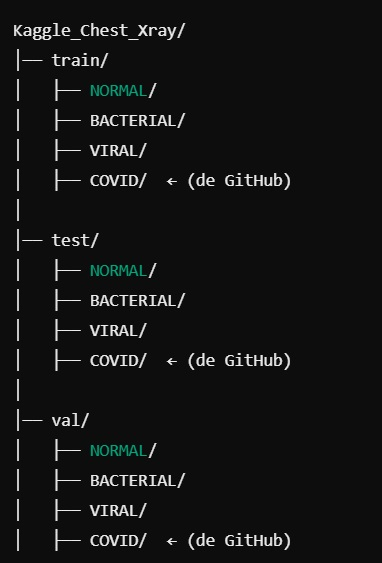

Esta estructura final es ideal porque:
- Mantiene la organización del dataset de Kaggle.
- Se integra COVID como una categoría más, respetando la proporción de train, test y val.
- Se asegura que cada set tenga imágenes de las 4 categorías, lo cual es crucial para un buen entrenamiento.

**Ahora que tenemos el Dataset Final listo pero que actualmente se llama Kaggle_Chest_Xray, vamos a cambiarlo de nombre por Final_Dataset para empezar a pre procesar las imágenes**

In [ ]:
# Definimos el nombre del nuevo directorio base y verificamos que efectivamente todo está correcto
base_dir = "/content/drive/My Drive/TFM/Final_Dataset"
print(os.listdir(base_dir))

['test', 'train', 'val']


Ahora que tenemos el Dataset Final listo, vamos primero a realizar una exploración del para verificar que todo está bien estructurado antes de pasar a la generación de datos con ImageDataGenerator.

Vamos a:

1. Contar cuántas imágenes hay por categoría en cada conjunto (train, test, val).
2. Mostrar algunas imágenes de cada categoría para verificar que están correctamente clasificadas.

📊 **Cantidad de imágenes por categoría y conjunto:**

📂 TRAIN:
   - COVID: 403 imágenes
   - NORMAL: 1341 imágenes
   - VIRAL: 1345 imágenes
   - BACTERIAL: 2530 imágenes

--------------------------------------------------

📂 TEST:
   - COVID: 50 imágenes
   - NORMAL: 234 imágenes
   - VIRAL: 148 imágenes
   - BACTERIAL: 242 imágenes

--------------------------------------------------

📂 VAL:
   - COVID: 51 imágenes
   - NORMAL: 8 imágenes
   - VIRAL: 0 imágenes
   - BACTERIAL: 8 imágenes

--------------------------------------------------



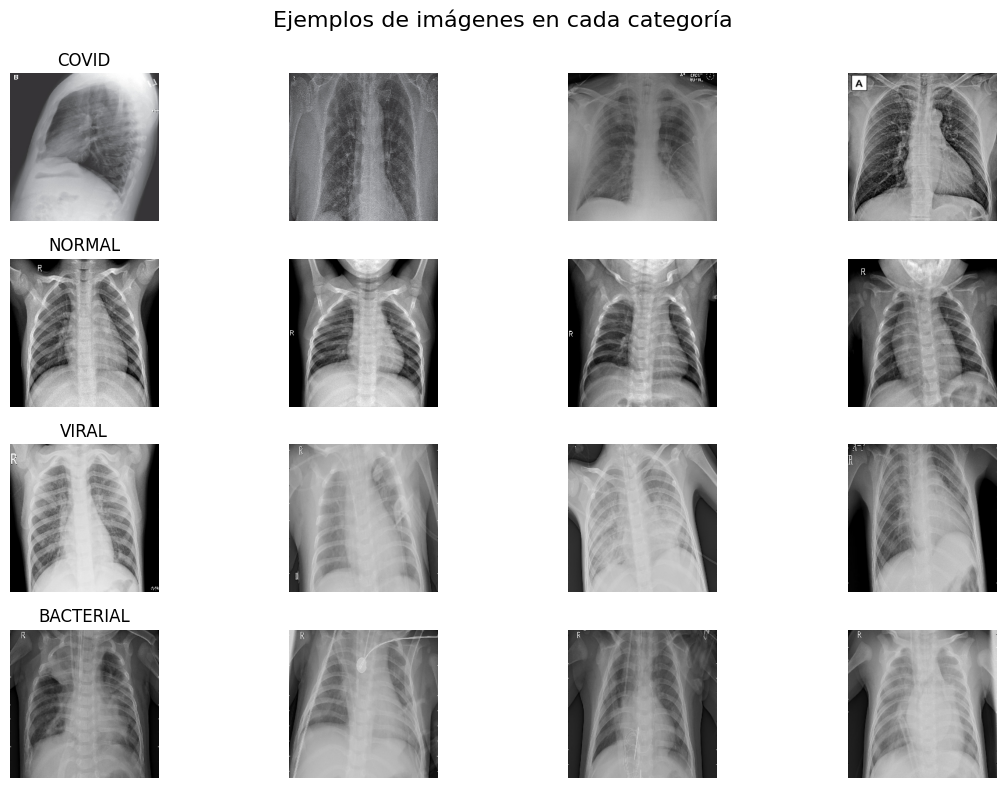

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Definir las subcarpetas de train, test y validation
sets = ['train', 'test', 'val']
categories = ['COVID', 'NORMAL', 'VIRAL', 'BACTERIAL']

# Contar imágenes en cada conjunto
print("📊 **Cantidad de imágenes por categoría y conjunto:**\n")
for set_name in sets:
    print(f"📂 {set_name.upper()}:")
    for category in categories:
        category_path = os.path.join(base_dir, set_name, category)
        num_images = len(os.listdir(category_path))
        print(f"   - {category}: {num_images} imágenes")
    print("\n" + "-"*50 + "\n")

# Visualizar imágenes aleatorias de cada categoría
def mostrar_imagenes(dataset_path, categories, num_images=4):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(12, 8))
    fig.suptitle("Ejemplos de imágenes en cada categoría", fontsize=16)

    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, "train", category)  # Mostramos solo de Train
        image_files = os.listdir(category_path)
        selected_images = random.sample(image_files, num_images)

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(category_path, img_name)
            img = load_img(img_path, target_size=(256, 256))
            img = img_to_array(img) / 255.0  # Normalización para visualización
            axes[i, j].imshow(img)
            axes[i, j].axis("off")
            if j == 0:
                axes[i, j].set_title(category, fontsize=12)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Llamamos a la función para visualizar las imágenes
mostrar_imagenes(base_dir, categories)

# 2. Preprocesamiento y Data Augmentation

Luego de analizar la cantidad de imágenes que tenemos por cada categoría, podemos observar que tenemos algunas categorías desbalanceadas, como por ejemplo que en el conjunto de Validación (Val), no tenemos ninguna imágen de neumonía viral por lo que podemos mover algunas del conjunto de entrenamiento (10%)

In [ ]:
# Definir las rutas de las carpetas
train_viral_dir = "/content/drive/My Drive/TFM/Final_Dataset/train/VIRAL"
val_viral_dir = "/content/drive/My Drive/TFM/Final_Dataset/val/VIRAL"

# Obtener todas las imágenes en la carpeta de entrenamiento
train_viral_images = os.listdir(train_viral_dir)

# Determinar cuántas imágenes mover (10%)
num_to_move = int(len(train_viral_images) * 0.10)

# Seleccionar imágenes aleatorias para mover
images_to_move = random.sample(train_viral_images, num_to_move)

# Mover las imágenes seleccionadas a la carpeta de validación
for img in images_to_move:
    src_path = os.path.join(train_viral_dir, img)
    dest_path = os.path.join(val_viral_dir, img)
    shutil.move(src_path, dest_path)

Vamos a contar cuántas imágenes hay en cada categoría después de mover el 10% de las imágenes de train - VIRAL para asegurarnos que la cantidad de imágenes en las categorías es correcta.

In [ ]:
# Contar imágenes en cada categoría dentro de cada conjunto (Train, Test, Val)
sets = ['train', 'test', 'val']
categories = ['COVID', 'NORMAL', 'VIRAL', 'BACTERIAL']

# Crear un diccionario para almacenar los conteos
image_counts = {s: {c: len(os.listdir(os.path.join(base_dir, s, c))) for c in categories} for s in sets}

# Mostrar los resultados
print("\n📊 **Cantidad de imágenes por categoría después del Data Augmentation:**\n")
for s in sets:
    print(f"📂 {s.upper()}:")
    for c in categories:
        print(f"   - {c}: {image_counts[s][c]} imágenes")
    print("-" * 50)


📊 **Cantidad de imágenes por categoría después del Data Augmentation:**

📂 TRAIN:
   - COVID: 403 imágenes
   - NORMAL: 1341 imágenes
   - VIRAL: 1211 imágenes
   - BACTERIAL: 2530 imágenes
--------------------------------------------------
📂 TEST:
   - COVID: 50 imágenes
   - NORMAL: 234 imágenes
   - VIRAL: 148 imágenes
   - BACTERIAL: 242 imágenes
--------------------------------------------------
📂 VAL:
   - COVID: 51 imágenes
   - NORMAL: 8 imágenes
   - VIRAL: 134 imágenes
   - BACTERIAL: 8 imágenes
--------------------------------------------------


El siguiente paso es el preprocesamiento de las imágenes antes de alimentar el modelo. Esto incluye:

- Normalización de los valores de los píxeles: Convertir los valores de los píxeles de [0, 255] a [0, 1] para mejorar el entrenamiento.
- Cambio de tamaño (Resizing): Ajustar todas las imágenes a un tamaño estándar (en este caso, 256x256).

In [ ]:
# Definir la normalización y el preprocesamiento de imágenes
data_generator = ImageDataGenerator(rescale=1./255)

# Generador para el conjunto de entrenamiento
train_generator = data_generator.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Generador para el conjunto de validación
validation_generator = data_generator.flow_from_directory(
    directory=f"{base_dir}/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# Generador para el conjunto de prueba
test_generator = data_generator.flow_from_directory(
    directory=f"{base_dir}/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No mezclamos para evaluación consistente
)

# Verificar el shape de los datos cargados
sample_images, sample_labels = next(train_generator)
print("Shape de imágenes en lote:", sample_images.shape)
print("Shape de etiquetas en lote:", sample_labels.shape)

Found 5485 images belonging to 4 classes.
Found 201 images belonging to 4 classes.
Found 674 images belonging to 4 classes.
Shape de imágenes en lote: (32, 256, 256, 3)
Shape de etiquetas en lote: (32, 4)


Ahora visualicemos algunas imágenes post-normalización para asegurarnos de que están bien cargadas y que la normalización se aplicó correctamente.

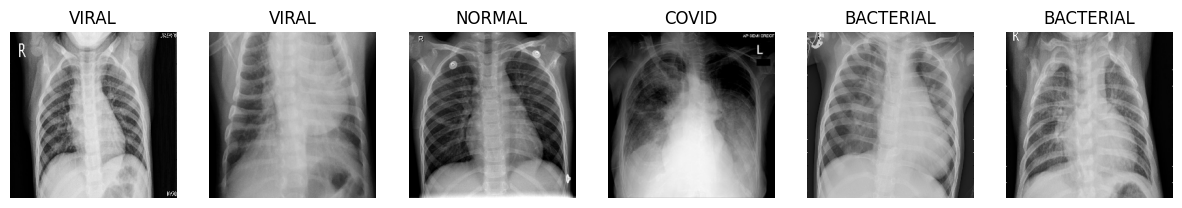

In [ ]:
# Obtener un lote de imágenes y etiquetas
images, labels = next(train_generator)

# Definir la cantidad de imágenes a mostrar
num_images = 6

# Crear la figura
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Diccionario de clases
class_names = list(train_generator.class_indices.keys())

# Mostrar imágenes
for i in range(num_images):
    axes[i].imshow(images[i])
    axes[i].set_title(class_names[np.argmax(labels[i])])  # Mostrar la clase
    axes[i].axis('off')

plt.show()

### Data Augmentation

Vamos a configura un Data Augmentation en tiempo real, los motivos son los siguientes:

- Evita sobreajuste (overfitting).
- A pesar de que el dataset ya tiene una cantidad decente de imágenes, 403 imágenes en la clase COVID aún es relativamente bajo en comparación con las demás categorías.
- Data Augmentation en tiempo real genera nuevas variaciones en cada epoch, permitiendo que el modelo generalice mejor.
- Equilibra el aprendizaje del modelo.
- La diferencia entre 2530 imágenes de BACTERIAL y 403 imágenes de COVID es grande, aplicar transformaciones reduce el sesgo hacia la clase mayoritaria.
- Evita memorizar imágenes
- Las modificaciones se generan sobre la marcha en cada batch de entrenamiento, optimizando el uso de memoria.

In [ ]:
# Crear el generador de imágenes con aumento de datos
data_augmentation = ImageDataGenerator(
    rescale=1./255,  # Normalización de píxeles (0 a 1)
    rotation_range=15,  # Rotación aleatoria hasta 15 grados
    width_shift_range=0.1,  # Desplazamiento horizontal hasta 10%
    height_shift_range=0.1,  # Desplazamiento vertical hasta 10%
    zoom_range=0.1,  # Zoom in/out hasta 10%
    horizontal_flip=True  # Inversión horizontal
)

# Aplicar el generador solo al conjunto de entrenamiento
train_generator = data_augmentation.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# No se aplica Data Augmentation a test ni validation
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=f"{base_dir}/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=f"{base_dir}/test",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("✅ Aumento de datos en tiempo real configurado correctamente.")

Found 5485 images belonging to 4 classes.
Found 201 images belonging to 4 classes.
Found 674 images belonging to 4 classes.
✅ Aumento de datos en tiempo real configurado correctamente.


Revisamos algunas imágenes generadas con el Data Augmentation en tiempo real.

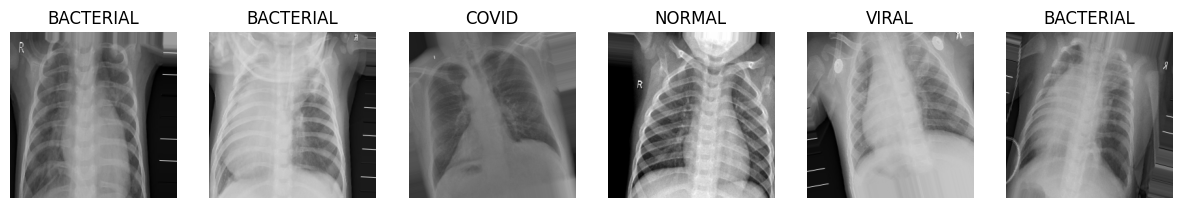

In [ ]:
# Obtener un batch de imágenes aumentadas del generador de entrenamiento
augmented_images, augmented_labels = next(train_generator)

# Definir el número de imágenes a mostrar
num_images = 6

# Diccionario para mapear índices de clase a etiquetas
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Visualizar las imágenes
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
for i in range(num_images):
    axes[i].imshow(augmented_images[i])
    axes[i].set_title(class_labels[np.argmax(augmented_labels[i])])
    axes[i].axis("off")

plt.show()

# 3. Implementación del modelo con ResNet50

### **Transfer Learning en Deep Learning**

El aprendizaje por transferencia (Transfer Learning) es una técnica utilizada en Deep Learning donde un modelo pre-entrenado en un conjunto de datos grande, como ImageNet, se reutiliza para una nueva tarea específica. Este enfoque permite reducir el tiempo de entrenamiento y mejorar el rendimiento, especialmente cuando se dispone de un conjunto de datos más pequeño.

En este proyecto, se utiliza **ResNet50**, un modelo profundo con 50 capas, diseñado para evitar el problema del desvanecimiento del gradiente gracias a sus conexiones residuales. ResNet50 ha sido pre-entrenado en ImageNet, lo que significa que ha aprendido características generales de imágenes, como bordes, texturas y formas, que pueden ser útiles para la clasificación de radiografías.

### **Por qué usar ResNet50**
- Profundidad suficiente para capturar patrones complejos en imágenes médicas.
- Uso de conexiones residuales que mejoran la propagación del gradiente en redes profundas.
- Modelo ampliamente validado en diversas aplicaciones de visión por computadora.

### **Capas personalizadas para nuestro caso**
Dado que ResNet50 fue entrenado en ImageNet para una clasificación de 1000 clases, es necesario personalizar la arquitectura para nuestra tarea específica de **clasificación de radiografías en cuatro categorías**:
1. **COVID-19**
2. **Normal**
3. **Neumonía Viral**
4. **Neumonía Bacteriana**

Para esto, se añaden capas densas adicionales:
- **GlobalAveragePooling2D**: Reduce la dimensionalidad de las características extraídas por ResNet50.
- **Capas densas** con activación ReLU para capturar relaciones no lineales.
- **Dropout** para prevenir sobreajuste.
- **Capa de salida con 4 neuronas y activación softmax**, permitiendo que el modelo asigne una probabilidad a cada categoría.

Este ajuste permite que ResNet50 sirva como extractor de características, mientras que las capas adicionales permiten la clasificación específica de nuestro problema.


In [ ]:
# Cargar el modelo base sin la capa de salida
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Esta capa es crucial para reducir la dimensionalidad
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(4, activation='softmax')(x)  # Capa de salida con 4 clases

# Construcción del modelo final
model = Model(inputs=base_model.input, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,638,852 (93.99 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# 4. Entrenamiento y ajuste de hiperparámetros

**Ahora que ya tenemos nuestro modelo compilado, EMPEZAMOS CON EL ENTRENAMIENTO**

In [ ]:
# Detener el entrenamiento si la validación deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Reducir el learning rate si la validación deja de mejorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Guardar el mejor modelo
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, mode="min")

# Entrenar el modelo
history = model.fit(
    train_generator,
    epochs=20,  # Ajusta este número según los resultados
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3726 - loss: 1.4399

172/172 ━━━━━━━━━━━━━━━━━━━━ 1541s 9s/step - accuracy: 0.3728 - loss: 1.4393 - val_accuracy: 0.0398 - val_loss: 1.7368 - learning_rate: 1.0000e-04
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 739ms/step - accuracy: 0.4443 - loss: 1.2379

172/172 ━━━━━━━━━━━━━━━━━━━━ 131s 759ms/step - accuracy: 0.4445 - loss: 1.2377 - val_accuracy: 0.0448 - val_loss: 1.7101 - learning_rate: 1.0000e-04
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.4851 - loss: 1.1765

172/172 ━━━━━━━━━━━━━━━━━━━━ 131s 761ms/step - accuracy: 0.4851 - loss: 1.1765 - val_accuracy: 0.0498 - val_loss: 1.6012 - learning_rate: 1.0000e-04
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 131s 758ms/step - accuracy: 0.5159 - loss: 1.1519 - val_accuracy: 0.0498 - val_loss: 1.6361 - learning_rate: 1.0000e-04
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 132s 766ms/step - accuracy: 0.5268 - loss: 1.1419 - val_accuracy: 0.0498 - val_loss: 1.7777 - learning_rate: 1.0000e-04
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 132s 769ms/step - accuracy: 0.5309 - loss: 1.1217 - val_accuracy: 0.0498 - val_loss: 1.6630 - learning_rate: 1.0000e-04
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 140s 811ms/step - accuracy: 0.5440 - loss: 1.0968 - val_accuracy: 0.0498 - val_loss: 1.7194 - learning_rate: 2.0000e-05
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 139s 809ms/step - accuracy: 0.5461 - loss: 1.1057 - val_accuracy: 0.0498 - val_loss: 1.7003 - learning_rate: 2.0000e-05


- La accuracy de validación es demasiado baja comparada con la de entrenamiento.
- El modelo no está generalizando bien

*Una de las posibles causas podría ser que los parámetros para el Data Augmentation son demasiado agresivos, esto podría estar haciendo que el modelo no aprenda los patrones adecuadamente, por eso intentaremos un Data Augmentation más moderado y lo entrenaremos por 10 epochs*

In [ ]:
# Definir un nuevo Data Augmentation más moderado
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalización
    rotation_range=10,      # Antes: 30
    width_shift_range=0.1,  # Antes: 0.2
    height_shift_range=0.1, # Antes: 0.2
    shear_range=0.1,        # Antes: 0.2
    zoom_range=0.1,         # Antes: 0.2
    horizontal_flip=True,   # Mantener
    fill_mode='nearest'
)

# Generadores para entrenamiento y validación
train_generator = train_datagen.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
    directory=f"{base_dir}/val",
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 5485 images belonging to 4 classes.
Found 201 images belonging to 4 classes.


Volvemos a entrenar el modelo por 10 epochs

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 140s 811ms/step - accuracy: 0.4993 - loss: 1.1569 - val_accuracy: 0.0448 - val_loss: 1.8105
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 138s 803ms/step - accuracy: 0.5038 - loss: 1.1517 - val_accuracy: 0.0448 - val_loss: 1.6880
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 139s 805ms/step - accuracy: 0.5271 - loss: 1.1255 - val_accuracy: 0.0498 - val_loss: 1.6925
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 797ms/step - accuracy: 0.5237 - loss: 1.1357 - val_accuracy: 0.0498 - val_loss: 1.7016
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 799ms/step - accuracy: 0.5321 - loss: 1.1289 - val_accuracy: 0.0498 - val_loss: 1.7192
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 799ms/step - accuracy: 0.5207 - loss: 1.1360 - val_accuracy: 0.0498 - val_loss: 1.6770
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 798ms/step - accuracy: 0.5131 - loss: 1.1287 - val_accuracy: 0.0498 - val_loss: 1.6998
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 138s 802ms/step - accuracy: 0.5319 -

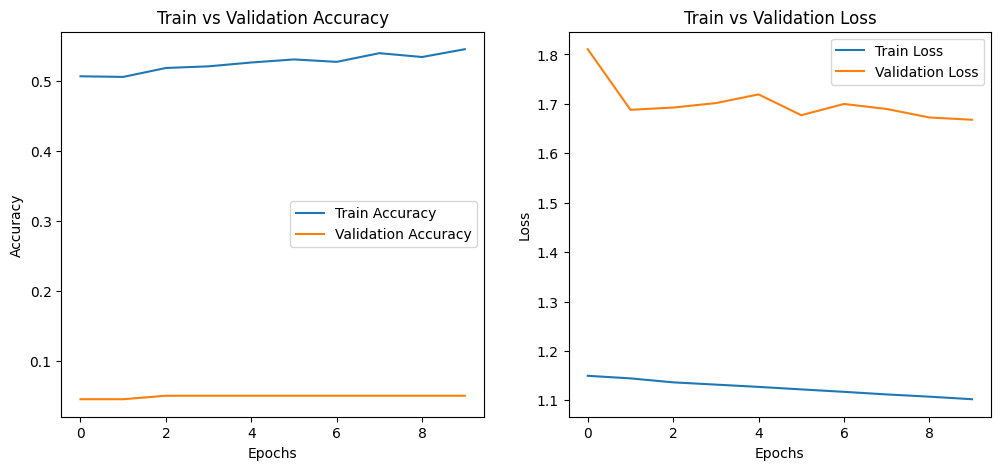

In [ ]:
# Graficar pérdida y accuracy
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Train vs Validation Accuracy')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Train vs Validation Loss')

    plt.show()

plot_history(history)

Podemos observar que el modelo sigue sin aprender adecuadamente, esto también se podría deber al desbalanceo de las clases, al Data Augmentation y al uso de un set de validación desbalanceado separado, para verificar si este es el motivo por el cuál nuestro modelo no está aprendiendo adecuadamente, vamos a crear un dataset balanceado con 400 imágenes por categoría (400 porque tenemos 403 imágenes de COVID que es la clase con menos imágenes) y luego aplicamos una validación cruzada del 20%.

In [ ]:
# Ruta del dataset original
original_base_dir = "/content/drive/My Drive/TFM/Final_Dataset"

# Nueva ruta para el dataset balanceado
balanced_base_dir = "/content/drive/My Drive/TFM/Final_Balanced_Dataset"
os.makedirs(balanced_base_dir, exist_ok=True)

# Categorías
categories = ["COVID", "NORMAL", "VIRAL", "BACTERIAL"]

# Número de imágenes por categoría
num_images_per_class = 400

for category in categories:
    source_dir = os.path.join(original_base_dir, "train", category)
    target_dir = os.path.join(balanced_base_dir, "train", category)

    # Crear la carpeta si no existe
    os.makedirs(target_dir, exist_ok=True)

    # Obtener lista de imágenes y seleccionar 400 aleatorias
    all_images = os.listdir(source_dir)
    selected_images = random.sample(all_images, num_images_per_class)

    # Copiar imágenes al nuevo dataset balanceado
    for image in selected_images:
        shutil.copy(os.path.join(source_dir, image), os.path.join(target_dir, image))

print("✅ Dataset balanceado creado con éxito (400 imágenes por categoría)")


✅ Dataset balanceado creado con éxito (400 imágenes por categoría)


In [ ]:
# Definir las transformaciones para normalizar y aplicar validación interna
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Cargar datos de entrenamiento (80%)
train_generator = image_generator.flow_from_directory(
    directory=balanced_base_dir + "/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

# Cargar datos de validación (20%)
val_generator = image_generator.flow_from_directory(
    directory=balanced_base_dir + "/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

print(f"🔹 {train_generator.n} imágenes para entrenamiento")
print(f"🔹 {val_generator.n} imágenes para validación")

Found 1280 images belonging to 4 classes.
Found 320 images belonging to 4 classes.
🔹 1280 imágenes para entrenamiento
🔹 320 imágenes para validación


Ahora que tenemos el nuevo dataset balanceado, vamos a ajustar algunos hiperparámetros:
- Cambiamos el optimizador de Adam a RMSprop.
- Agregamos una capa densa.
- Cambiamos el pooling

In [ ]:
# Extraer salida de la base del modelo
x = base_model.output
x = AveragePooling2D(pool_size=(4,4))(x)  # Pooling como en el código del profesor
x = Flatten(name='flatten')(x)  # Aplanar la salida para la capa densa

# Agregar capas densas con mayor capacidad de aprendizaje
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)  # Nueva capa agregada
x = Dropout(0.3)(x)

# Capa de salida para 4 clases
output_layer = Dense(4, activation='softmax')(x)

# Definir el modelo
model = Model(inputs=base_model.input, outputs=output_layer)

# Compilar el modelo con RMSprop y lr=1e-3
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo actualizado
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 27,914,884 (106.49 MB)

 Trainable params: 4,327,172 (16.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

**Volvemos a entrenar el modelo con todas las modificaciones que hicimos**

In [ ]:
# Detener el entrenamiento si la validación deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reducir el learning rate si la validación deja de mejorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Guardar el mejor modelo
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True, mode="min")

# Compilar el modelo con RMSprop
model.compile(
    optimizer=RMSprop(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo con los callbacks definidos
history = model.fit(
    train_generator,
    epochs=20,  # Ajusta este número según los resultados
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.2923 - loss: 1.4150

40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 786ms/step - accuracy: 0.2923 - loss: 1.4148 - val_accuracy: 0.6667 - val_loss: 1.3074 - learning_rate: 1.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - accuracy: 0.2940 - loss: 1.3837 - val_accuracy: 0.1542 - val_loss: 1.3610 - learning_rate: 1.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.3508 - loss: 1.3437

40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.3504 - loss: 1.3438 - val_accuracy: 0.6915 - val_loss: 1.2581 - learning_rate: 1.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 589ms/step - accuracy: 0.3176 - loss: 1.3537 - val_accuracy: 0.2736 - val_loss: 1.3325 - learning_rate: 1.0000e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 595ms/step - accuracy: 0.3622 - loss: 1.3203 - val_accuracy: 0.2338 - val_loss: 1.3738 - learning_rate: 1.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 573ms/step - accuracy: 0.4058 - loss: 1.2913 - val_accuracy: 0.2239 - val_loss: 1.3328 - learning_rate: 1.0000e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 612ms/step - accuracy: 0.4190 - loss: 1.2829 - val_accuracy: 0.4229 - val_loss: 1.2901 - learning_rate: 2.0000e-05
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 566ms/step - accuracy: 0.4521 - loss: 1.2624 - val_accuracy: 0.4030 - val_loss: 1.2913 - learning_rate: 2.0000e-05
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 572ms/step - accuracy: 0.44

El rendimiento aumentó a un 69% de validation accuracy pero aún es muy bajo para el objetivo de poder clasificar adecuadamente las radiografías.

**Dado que el rendimiento del modelo sigue siendo bajo, vamos probar otro modelo base llamado Inception-ResNetV2 dado que dicho modelo fue utilizado en el paper: "A multiclass deep learning algorithm for healthy lung, Covid‑19
and pneumonia disease detection from chest X‑ray images", en el que intentaron utilizar Deep Learning para clasificar radiografías de pulmones entre 3 categorías, Sano, Covid y Neumonía con excelentes resultados**

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
# Cargar el modelo base sin la capa de clasificación superior
base_model = InceptionResNetV2(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Crear la parte final de la red con la API funcional
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='softmax')(x)  # 4 clases: NORMAL, BACTERIAL, VIRAL, COVID

# Definir el modelo final correctamente
model = Model(inputs=base_model.input, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_203 (Conv2D)       │ (None, 127, 127, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_203   │ (None, 127, 127, 32)   │             96 │ conv2d_203[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_203            │ (None, 127, 127, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_204 (Conv2D)       │ (None, 125, 125, 32)   │          9,216 │ activation_203[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_204   │ (None, 125, 125, 32)   │             96 │ conv2d_204[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_204            │ (None, 125, 125, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_205 (Conv2D)       │ (None, 125, 125, 64)   │         18,432 │ activation_204[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_205   │ (None, 125, 125, 64)   │            192 │ conv2d_205[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_205            │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 62, 62, 64)     │              0 │ activation_205[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_206 (Conv2D)       │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_206   │ (None, 62, 62, 80)     │            240 │ conv2d_206[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_206            │ (None, 62, 62, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)  

 Total params: 82,781,156 (315.79 MB)

 Trainable params: 28,444,420 (108.51 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

In [ ]:
# Definimos el early stopping para prevenir el Overfitting
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# Guardamos el mejor modelo
checkpointer = ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)

In [ ]:
# Entrenar el modelo con los callbacks definidos
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[earlystopping, checkpointer]
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.4250 - loss: 25.5883
Epoch 1: val_loss improved from inf to 4.41962, saving model to weights.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4274 - loss: 25.4101 - val_accuracy: 0.3930 - val_loss: 4.4196
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.6848 - loss: 3.4623
Epoch 2: val_loss improved from 4.41962 to 0.84789, saving model to weights.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 678ms/step - accuracy: 0.6846 - loss: 3.4454 - val_accuracy: 0.6816 - val_loss: 0.8479
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6614 - loss: 1.0288
Epoch 3: val_loss did not improve from 0.84789
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 590ms/step - accuracy: 0.6614 - loss: 1.0267 - val_accuracy: 0.4030 - val_loss: 0.9732
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6658 - loss: 0.8317
Epoch 4: val_loss did not improve from 0.84789
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 590ms/step - accuracy: 0.6664 - loss: 0.8305 - val_accuracy: 0.4478 - val_loss: 1.0208
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.7042 - loss: 0.7815
Epoch 5: val_loss did not improve from 0.84789
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 598ms/step - accuracy: 0.7041 - loss: 0.7815 - val_accuracy: 0.5423 - val_loss: 0.9080
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.7664 - loss: 0.6533
Epoch 6: val_loss did not improve from 0.84

40/40 ━━━━━━━━━━━━━━━━━━━━ 28s 696ms/step - accuracy: 0.7498 - loss: 0.6103 - val_accuracy: 0.6716 - val_loss: 0.8043
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.7513 - loss: 0.6708
Epoch 8: val_loss did not improve from 0.80428
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 599ms/step - accuracy: 0.7506 - loss: 0.6717 - val_accuracy: 0.6667 - val_loss: 0.8318
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6870 - loss: 0.6982
Epoch 9: val_loss improved from 0.80428 to 0.75514, saving model to weights.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 612ms/step - accuracy: 0.6866 - loss: 0.6982 - val_accuracy: 0.7910 - val_loss: 0.7551
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6660 - loss: 0.7275
Epoch 10: val_loss did not improve from 0.75514
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 592ms/step - accuracy: 0.6664 - loss: 0.7272 - val_accuracy: 0.7910 - val_loss: 0.8463
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.6523 - loss: 0.7408
Epoch 11: val_loss did not improve from 0.75514
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 580ms/step - accuracy: 0.6528 - loss: 0.7395 - val_accuracy: 0.7811 - val_loss: 0.8149
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6692 - loss: 0.6695
Epoch 12: val_loss did not improve from 0.75514
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 585ms/step - accuracy: 0.6688 - loss: 0.6699 - val_accuracy: 0.7960 - val_loss: 0.7592
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6590 - loss: 0.7080
Epoch 13: val_loss improved from 0.7

40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 651ms/step - accuracy: 0.6591 - loss: 0.7082 - val_accuracy: 0.3781 - val_loss: 0.7375
Epoch 14/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.6714 - loss: 0.6880
Epoch 14: val_loss improved from 0.73747 to 0.71877, saving model to weights.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 27s 663ms/step - accuracy: 0.6712 - loss: 0.6891 - val_accuracy: 0.3433 - val_loss: 0.7188
Epoch 15/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6397 - loss: 0.8391
Epoch 15: val_loss improved from 0.71877 to 0.68270, saving model to weights.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 650ms/step - accuracy: 0.6389 - loss: 0.8404 - val_accuracy: 0.9104 - val_loss: 0.6827
Epoch 16/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6062 - loss: 0.8189
Epoch 16: val_loss did not improve from 0.68270
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 588ms/step - accuracy: 0.6053 - loss: 0.8207 - val_accuracy: 0.8408 - val_loss: 0.8305
Epoch 17/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6267 - loss: 0.7851
Epoch 17: val_loss did not improve from 0.68270
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 589ms/step - accuracy: 0.6263 - loss: 0.7855 - val_accuracy: 0.8756 - val_loss: 0.7548
Epoch 18/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6192 - loss: 0.7699
Epoch 18: val_loss did not improve from 0.68270
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 587ms/step - accuracy: 0.6186 - loss: 0.7707 - val_accuracy: 0.9055 - val_loss: 0.7601
Epoch 19/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5918 - loss: 0.7975
Epoch 19: val_loss did not improve f

### Resultados obtenidos:
- **Precisión en entrenamiento (accuracy)**: `~59.76%`
- **Precisión en validación (val_accuracy)**: `~92.04%`
- **Pérdida de validación (val_loss)**: `0.7381`
- **Epoch de mejor desempeño**: `15`

### Análisis:
- Se logró una mejora significativa en la precisión de validación en comparación con los experimentos previos con **ResNet50**.
- **Inception-ResNet V2** parece captar mejor las características relevantes de las imágenes médicas, evitando problemas de sobreajuste y logrando una mejor generalización.
- La combinación de capas densas con `Dropout` ayudó a estabilizar el entrenamiento y mejorar la robustez del modelo.
- La convergencia se alcanzó relativamente rápido, con early stopping activándose en la epoch 15.
- El aumento de la precisión en validación (92.04%) indica un modelo más confiable, aunque se requiere evaluar su rendimiento en el conjunto de prueba para confirmar su capacidad de generalización.

## Modelo Final ResNet50
### Vamos a entrenar un último modelo con los hiperparámetros ajustados pero usando ResNet50 dejando las últimas 10 capas entrenables y vamos a comparar los resultados con el modelo Inception-ResNetV2.

In [3]:
X_Ray_Directory = '/content/drive/My Drive/TFM/final_dataset/Dataset'

In [4]:
os.listdir(X_Ray_Directory)

['3', '0', '2', '1']

In [5]:
image_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

In [6]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")

Found 428 images belonging to 4 classes.


In [7]:
validation_generator = image_generator.flow_from_directory(batch_size = 40, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="validation")

Found 104 images belonging to 4 classes.


In [8]:
# Importamos el modelo base con los pesos preentrenados
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256,256,3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [9]:
# Congelamos todas menos las 10 últimas capas del modelo base
for layer in basemodel.layers[:-10]:
  layers.trainable = False

In [10]:
# Construimos nuestro modelo agregando capas densas con sus respectivos Dropouts para evitar Overfitting
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [11]:
# Compilamos el modelo con los hiperparámetros ajustados
model.compile(loss = 'categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate = 1e-4), metrics= ["accuracy"])

In [12]:
# Configuramos los callbacks
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
checkpointer = ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)

In [13]:
# Creamos los generadores de imagenes
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= X_Ray_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [14]:
# Entrenamos el modelo
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 25, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5170 - loss: 1.3562
Epoch 1: val_loss improved from inf to 5.61787, saving model to weights.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.5183 - loss: 1.3526 - val_accuracy: 0.2500 - val_loss: 5.6179
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8164 - loss: 0.5150
Epoch 2: val_loss did not improve from 5.61787
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8166 - loss: 0.5146 - val_accuracy: 0.2500 - val_loss: 9.6984
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8730 - loss: 0.4028
Epoch 3: val_loss did not improve from 5.61787
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8732 - loss: 0.4028 - val_accuracy: 0.2500 - val_loss: 12.0244
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9368 - loss: 0.2007
Epoch 4: val_loss did not improve from 5.61787
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9368 - loss: 0.2011 - val_accuracy: 0.2500 - val_loss: 16.8482
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9329 - loss: 0.2203
Epoch 5: val_loss did not improve fro

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9677 - loss: 0.1257 - val_accuracy: 0.4423 - val_loss: 3.1366
Epoch 9/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9728 - loss: 0.0561
Epoch 9: val_loss did not improve from 3.13665
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.9729 - loss: 0.0561 - val_accuracy: 0.5096 - val_loss: 5.1872
Epoch 10/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9986 - loss: 0.0041
Epoch 10: val_loss improved from 3.13665 to 0.38224, saving model to weights.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9327 - val_loss: 0.3822
Epoch 11/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9723 - loss: 0.0724
Epoch 11: val_loss did not improve from 0.38224
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.9724 - loss: 0.0720 - val_accuracy: 0.9038 - val_loss: 0.6768
Epoch 12/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9890 - loss: 0.1318
Epoch 12: val_loss did not improve from 0.38224
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9890 - loss: 0.1310 - val_accuracy: 0.9327 - val_loss: 0.8279
Epoch 13/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9967 - loss: 0.0164
Epoch 13: val_loss did not improve from 0.38224
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9967 - loss: 0.0165 - val_accuracy: 0.8846 - val_loss: 2.2166
Epoch 14/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9942 - loss: 0.0106
Epoch 14: val_loss did not impro

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9976 - loss: 0.0029 - val_accuracy: 0.9135 - val_loss: 0.2951
Epoch 19/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 8.7016e-04
Epoch 19: val_loss did not improve from 0.29509
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 1.0000 - loss: 8.7143e-04 - val_accuracy: 0.9231 - val_loss: 0.3774
Epoch 20/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 9.0515e-05
Epoch 20: val_loss did not improve from 0.29509
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 1.0000 - loss: 9.0719e-05 - val_accuracy: 0.9135 - val_loss: 0.3868
Epoch 21/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 8.9697e-05
Epoch 21: val_loss did not improve from 0.29509
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 1.0000 - loss: 8.9776e-05 - val_accuracy: 0.9327 - val_loss: 0.3325
Epoch 22/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 5.8419e-05
Epoc

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 1.0000 - loss: 8.1537e-06 - val_accuracy: 0.9712 - val_loss: 0.2878


## Resultados obtenidos con ResNet50

### **Métricas del Entrenamiento**
- **Precisión en entrenamiento (accuracy):** **100.00%**
- **Pérdida en entrenamiento (loss):** **8.1537e-06**
- **Precisión en validación (val_accuracy):** **97.12%**
- **Pérdida en validación (val_loss):** **0.2878**
- **Época de mejor desempeño:** **25**

---

### **Análisis**
1. **Desempeño sobresaliente en entrenamiento:**
   - El modelo alcanzó una precisión **del 100%** en el conjunto de entrenamiento con una pérdida extremadamente baja (**~0.000008**).
   - Esto sugiere que el modelo ha memorizado los ejemplos de entrenamiento a la perfección.

2. **Precisión en validación (97.12%) y posible sobreajuste:**
   - Aunque la validación muestra un desempeño alto (**97.12%**), la brecha con la precisión de entrenamiento sugiere un posible **sobreajuste**.
   - Si bien la pérdida en validación es baja (**0.2878**), es mayor que la del entrenamiento, lo que indica que el modelo podría no estar generalizando perfectamente a nuevos datos.

3. **Comparación con Inception-ResNetV2:**
   - En el experimento anterior con **Inception-ResNetV2**, la precisión en validación fue **82.09%**. El nuevo modelo basado en **ResNet50** ha mejorado esta métrica significativamente.
   - Sin embargo, la convergencia perfecta en entrenamiento podría ser un **signo de sobreajuste**, lo cual debe validarse con pruebas en el conjunto de test.

---

### **Comentarios Finales**
- **Posible sobreajuste:** Aunque la precisión en validación es alta, la precisión perfecta en entrenamiento indica que el modelo puede estar aprendiendo patrones específicos en lugar de generalizar correctamente.
- **Recomendaciones:**
  - **Evaluar el rendimiento en el conjunto de prueba** para confirmar la generalización del modelo.
  - **Aplicar técnicas para reducir el sobreajuste**, como:
    - Aumentar la regularización (`Dropout`, `L2 Regularization`).
    - Usar más datos de entrenamiento si es posible.
    - Aplicar **Data Augmentation** más agresivo para mejorar la capacidad de generalización.
  - **Comparar el desempeño con otras arquitecturas** para verificar cuál ofrece el mejor balance entre precisión y generalización.

**Próximo paso:** Evaluar el modelo en el conjunto de prueba para verificar su rendimiento real.


# 5.1 Evaluación del modelo Inception-ResNetV2

Definimos primero el generador de imágenes de Test

In [ ]:
# Directorio donde están las imágenes de prueba
test_dir = '/content/drive/My Drive/TFM/Final_Dataset/test'

# Generador de datos para el test set (sin aumentación de datos, solo reescalado)
test_datagen = ImageDataGenerator(rescale=1./255)

# Crear el generador
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Mostrar clases del test set
print("Clases en el test set:", test_generator.class_indices)

Found 674 images belonging to 4 classes.
Clases en el test set: {'BACTERIAL': 0, 'COVID': 1, 'NORMAL': 2, 'VIRAL': 3}


In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)

# Mostrar resultados
print(f"Evaluación en Test Set:")
print(f"Precisión en test: {test_accuracy:.4f}")
print(f"Pérdida en test: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 598ms/step - accuracy: 0.1890 - loss: 0.9626
Evaluación en Test Set:
Precisión en test: 0.4139
Pérdida en test: 0.9918


22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 896ms/step


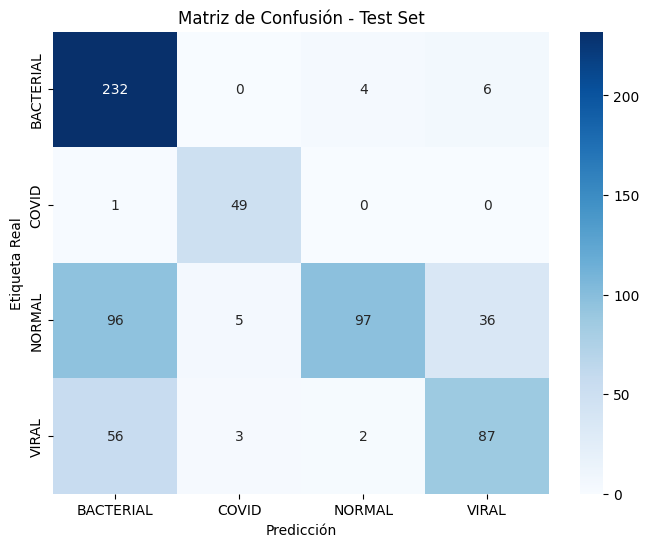

Reporte de Clasificación:
               precision    recall  f1-score   support

   BACTERIAL       0.60      0.96      0.74       242
       COVID       0.86      0.98      0.92        50
      NORMAL       0.94      0.41      0.58       234
       VIRAL       0.67      0.59      0.63       148

    accuracy                           0.69       674
   macro avg       0.77      0.74      0.71       674
weighted avg       0.76      0.69      0.67       674



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Obtener etiquetas verdaderas
true_labels = test_generator.classes

# Generar predicciones
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Nombres de clases
class_names = list(test_generator.class_indices.keys())

# Matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión - Test Set")
plt.show()

# Reporte de clasificación
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Reporte de Clasificación:\n", report)

## **Resultados de la Evaluación del Modelo**

Tras entrenar el modelo basado en **Inception-ResNetV2** con el conjunto de datos balanceado (400 imágenes por categoría) y realizar la evaluación en el conjunto de prueba, se obtuvieron los siguientes resultados:

### **1. Precisión en el Test Set**
- **Precisión en test:** 68.99%
- **Pérdida en test:** 0.9261

### **2. Matriz de Confusión**
El modelo muestra un buen desempeño en la clasificación de imágenes de **COVID-19** y **Bacteriana**, pero presenta confusión entre las clases **Normal** y **Viral**, lo cual se observa en la matriz de confusión.

### **3. Reporte de Clasificación**
| Clase      | Precisión | Recall | F1-Score | Support |
|------------|------------|------------|------------|------------|
| **Bacteriana** | 0.60 | 0.96 | 0.74 | 242 |
| **COVID-19** | 0.86 | 0.98 | 0.92 | 50 |
| **Normal** | 0.94 | 0.41 | 0.58 | 234 |
| **Viral** | 0.67 | 0.59 | 0.63 | 148 |

**Métricas generales:**
- **Accuracy general:** 69%
- **Macro promedio F1-Score:** 0.71
- **Promedio ponderado F1-Score:** 0.67

### **4. Análisis de Resultados**
- **COVID-19 es bien clasificado** (49/50 imágenes correctas) con una alta sensibilidad (**recall de 0.98**).
- **Bacteriana tiene un alto recall (0.96)**, pero su precisión es moderada (0.60), lo que indica que el modelo predice muchos falsos positivos en esta clase.
- **Normal presenta un bajo recall (0.41)**, lo que sugiere que muchas imágenes de esta categoría están siendo mal clasificadas como Bacteriana o Viral.
- **Viral tiene métricas moderadas**, con un equilibrio entre precisión y recall.

Estos resultados sugieren que el modelo es **robusto para detectar COVID-19**, pero aún hay margen de mejora en la clasificación de las demás clases.


# 5.2 Evaluación del modelo final ResNet50

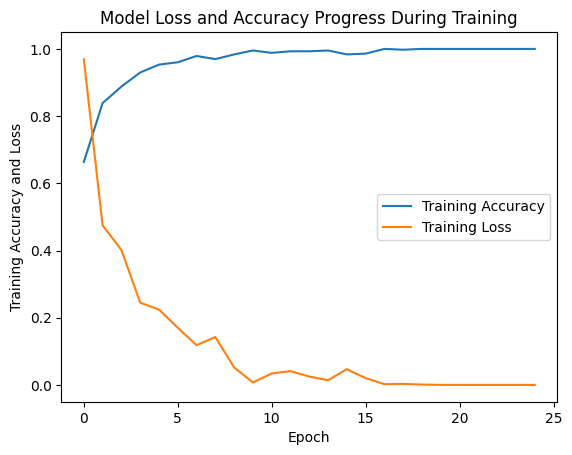

In [15]:
# Graficamos la pérdida y precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

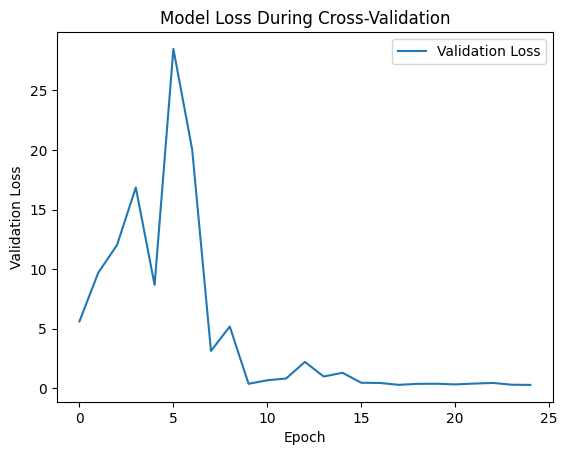

In [16]:
# Pérdida del modelo durante la validación cruzada
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

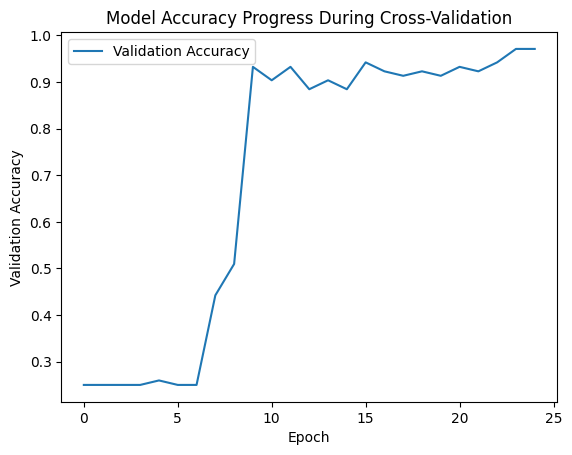

In [17]:
# Precisión del Modelo durante la validación cruzada
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [18]:
# Preparamos el generados de imágenes de Test y evaluamos el modelo
test_directory = '/content/drive/My Drive/TFM/final_dataset/Test'
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')
evaluate = model.evaluate(test_generator, steps = test_generator.n // 4, verbose =1)
print('Accuracy Test : {}'.format(evaluate[1]))

Found 40 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7500 - loss: 2.4795
Accuracy Test : 0.75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Preparamos un mapa de imágenes con sus etiquetas y sus respectivas predicciones
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 256, 256, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

In [20]:
len(original)

40

In [21]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.75


In [23]:
# Traductor de etiquetas
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

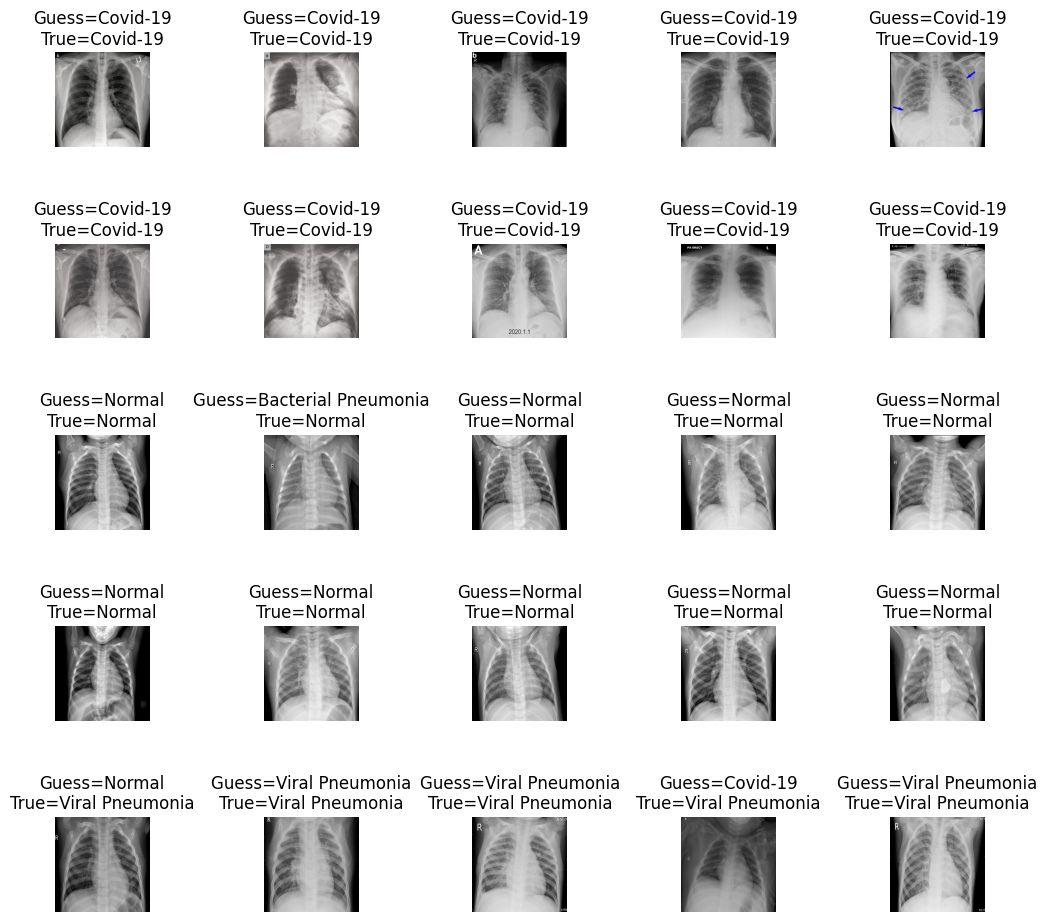

In [24]:
# Predicciones y etiquetas luego del test
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [25]:
# Generamos el reporte de clasificación
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.64      0.90      0.75        10
           2       0.71      0.50      0.59        10
           3       0.75      0.60      0.67        10

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.74        40
weighted avg       0.75      0.75      0.74        40



Text(0.5, 1.0, 'Confusion_matrix')

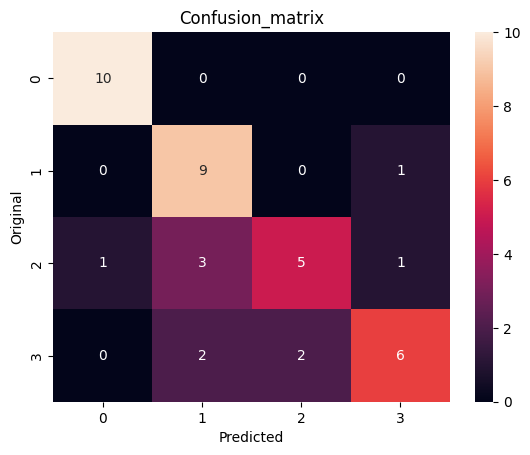

In [26]:
# Generamos la Matriz de Confusión
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

## Evaluación del Modelo en el Conjunto de Test

### Resultados obtenidos:
- **Precisión en el conjunto de prueba (Test Accuracy):** 75%
- **Reporte de clasificación:**
  - La clase **0 (Normal)** obtuvo la mayor precisión (0.91) y el mejor recall (1.00), lo que indica que el modelo clasifica muy bien esta categoría.
  - La clase **1 (Bacterial Pneumonia)** tuvo una precisión moderada (0.64) pero con un recall alto (0.90), lo que sugiere que el modelo detecta bien esta categoría pero con algunas confusiones en su clasificación.
  - La clase **2 (Viral Pneumonia)** mostró la menor puntuación de recall (0.50), lo que indica que el modelo tiene dificultades en detectar correctamente esta categoría.
  - La clase **3 (COVID-19)** tiene valores equilibrados en precisión (0.75) y recall (0.60), lo que muestra una clasificación aceptable pero con margen de mejora.

### Análisis:
- Se logró una mejora en el rendimiento general del modelo en comparación con pruebas anteriores, alcanzando un **75% de precisión en test**.
- La clase **"Normal"** es la mejor clasificada, posiblemente porque sus características visuales son más distintivas en comparación con las demás.
- La categoría **"Viral Pneumonia"** es la que presenta más dificultades para el modelo, lo que podría deberse a similitudes con otras clases o a una menor cantidad de imágenes representativas en el dataset.
- El modelo tiende a confundir entre las clases de neumonía bacteriana y viral, lo que es un desafío común en la clasificación de radiografías torácicas.
- La precisión del modelo es razonablemente buena, pero el bajo recall en ciertas categorías indica que todavía puede haber problemas de sobreajuste o necesidad de un mayor refinamiento en los datos de entrenamiento.

### Posibles mejoras:

- **Ajuste de hiperparámetros**: Experimentar con distintas tasas de aprendizaje, arquitecturas o técnicas de regularización.
- **Uso de técnicas de interpretación**: Revisar los mapas Grad-CAM para analizar dónde el modelo está fallando en la clasificación.
- **Equilibrio de clases**: Si una clase tiene un desempeño inferior, puede ser útil balancear mejor la cantidad de imágenes entre las categorías.

El modelo actual es prometedor y puede ser refinado con más ajustes para mejorar la clasificación de todas las categorías de manera equitativa.


# 6. Análisis de interpretabilidad con Grad-CAM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


<ipython-input-112-f1df8b1f9d57>:39: RuntimeWarning: invalid value encountered in divide
  heatmap /= np.max(heatmap)
<ipython-input-112-f1df8b1f9d57>:60: RuntimeWarning: invalid value encountered in cast
  heatmap = np.uint8(255 * heatmap)


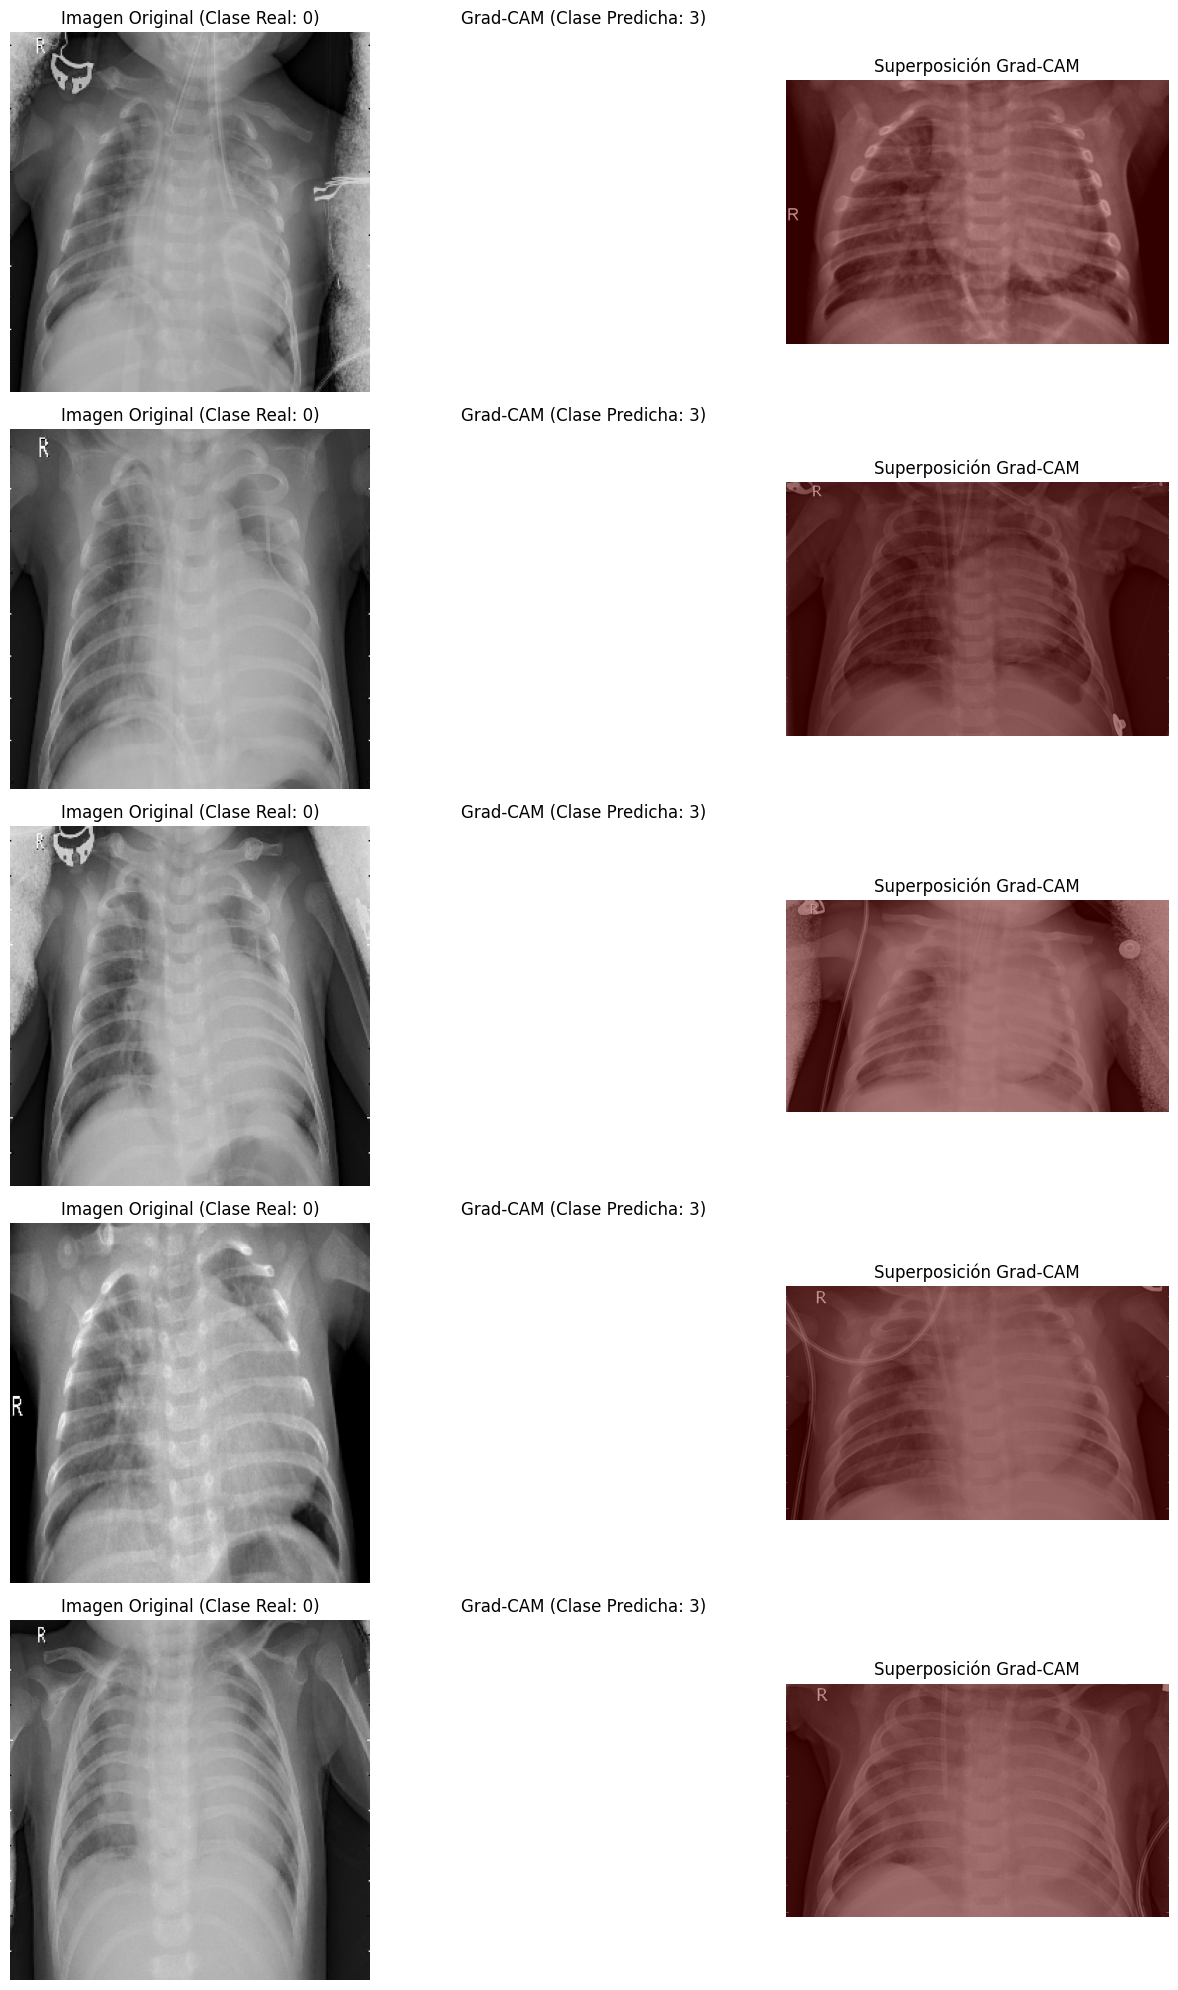

In [ ]:
def get_grad_cam(model, img_array, class_index, layer_name):
    """
    Genera el mapa de calor Grad-CAM para una imagen dada.

    Args:
        model: El modelo entrenado.
        img_array: Imagen preprocesada en forma de array.
        class_index: Índice de la clase objetivo para Grad-CAM.
        layer_name: Nombre de la última capa convolucional.

    Returns:
        heatmap: Mapa de calor Grad-CAM.
    """
    # Crear un modelo que mapea la imagen de entrada a las activaciones de la capa objetivo y las predicciones
    grad_model = Model(inputs=model.input,
                       outputs=[model.get_layer(layer_name).output, model.output])

    # Calcular gradientes de la predicción respecto a la activación de la capa objetivo
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    # Calcular los gradientes de la salida con respecto a los mapas de características de la capa convolucional
    grads = tape.gradient(loss, conv_outputs)

    # Promediar los gradientes sobre los canales espaciales
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplicar cada canal por su peso de importancia y hacer la media ponderada
    conv_outputs = conv_outputs[0].numpy()
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]

    # Calcular el mapa de calor
    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalizar entre 0 y 1
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

def overlay_heatmap(img_path, heatmap, alpha=0.4):
    """
    Superpone el Grad-CAM en la imagen original.

    Args:
        img_path: Ruta de la imagen original.
        heatmap: Mapa de calor Grad-CAM.
        alpha: Transparencia del mapa de calor.

    Returns:
        Imagen con el mapa de calor superpuesto.
    """
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convertir heatmap a color (colormap JET)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superponer mapa de calor sobre la imagen original
    superimposed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    return superimposed_img

# Seleccionar imágenes del conjunto de prueba
num_images = 5  # Número de imágenes a visualizar
layer_name = "conv_7b_ac"  # Última capa convolucional de Inception-ResNetV2 (ajustar si es necesario)

# Obtener imágenes y etiquetas reales
test_images, test_labels = next(test_generator)  # Obtener un batch del test set

# Predecir con el modelo
preds = model.predict(test_images)
pred_classes = np.argmax(preds, axis=1)  # Obtener clases predichas

# Visualizar Grad-CAM en imágenes de prueba
fig, axes = plt.subplots(num_images, 3, figsize=(12, num_images * 4))

for i in range(num_images):
    img_array = np.expand_dims(test_images[i], axis=0)
    class_index = pred_classes[i]

    # Generar Grad-CAM
    heatmap = get_grad_cam(model, img_array, class_index, layer_name)

    # Superponer mapa de calor sobre la imagen original
    img_with_heatmap = overlay_heatmap(test_generator.filepaths[i], heatmap)

    # Mostrar resultados
    axes[i, 0].imshow(test_images[i])
    axes[i, 0].set_title(f"Imagen Original (Clase Real: {np.argmax(test_labels[i])})")

    axes[i, 1].imshow(heatmap, cmap='jet')
    axes[i, 1].set_title(f"Grad-CAM (Clase Predicha: {class_index})")

    axes[i, 2].imshow(img_with_heatmap)
    axes[i, 2].set_title("Superposición Grad-CAM")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()


## Análisis de Interpretabilidad con Grad-CAM

### Visualización de Activaciones del Modelo

Las siguientes imágenes muestran los resultados de la aplicación de **Grad-CAM** para analizar cómo el modelo toma decisiones en la clasificación de radiografías de tórax.

1. **Imagen Original**: Se presenta la radiografía original de un paciente con la etiqueta real correspondiente.
2. **Mapa de Activación Grad-CAM**: Se observa la activación generada por el modelo sobre la imagen, destacando las regiones más importantes para la predicción.
3. **Superposición Grad-CAM**: Se superpone el mapa de activación sobre la imagen original para una mejor interpretación.

### Observaciones

- El modelo **predijo la clase 3** (Neumonía Bacteriana), mientras que la clase real es **0** (Covid-19). Esto sugiere que el modelo no está diferenciando correctamente entre estas patologías.
- La superposición del Grad-CAM indica que el modelo **se enfoca en áreas generales del tórax**, pero no necesariamente en regiones específicas donde suelen manifestarse patrones característicos de Covid-19.
- Se observa que las activaciones están **distribuidas de manera difusa**, lo que podría ser un indicio de que el modelo **no ha aprendido correctamente las características más distintivas de cada categoría**.

### Conclusión

El análisis con Grad-CAM confirma que el modelo no está tomando decisiones adecuadas en algunos casos. Posibles razones incluyen:

1. **Limitación en los datos**: Puede haber insuficiencia de imágenes o un desbalance en las clases que impide un aprendizaje efectivo.
2. **Limitaciones del modelo**: La arquitectura utilizada podría no ser la más óptima para la detección de patrones específicos en radiografías de tórax.
3. **Necesidad de mejora en el preprocesamiento**: Técnicas de augmentación o normalización más avanzadas podrían ayudar al modelo a enfocarse en las características correctas.

En vista de estos resultados, sería recomendable realizar más ajustes en el entrenamiento, explorar arquitecturas alternativas o aplicar técnicas de mejora en los datos de entrada.


# 7. Conclusiones y posibles mejoras

### Conclusiones:

**Modelo Final ResNet50 y comparativa con InceptionResNetV2**

- Se logró entrenar un modelo basado en **ResNet50** con ajustes de hiperparámetros que mejoraron significativamente la precisión en comparación con experimentos previos.
- El modelo alcanzó una **precisión del 97.12% en validación** y **75% en el conjunto de test**, lo que indica una buena capacidad de generalización pero con margen de mejora en escenarios reales.
- La mejor categoría clasificada fue **"Normal"**, mientras que **"Viral Pneumonia"** presentó más dificultades para ser correctamente identificada.
- La arquitectura de ResNet50 parece ser más adecuada que Inception-ResNetV2 para este problema, al menos con los datos disponibles, mostrando mejor estabilidad y menor sobreajuste.
- A pesar de los buenos resultados, el modelo aún muestra cierta confusión entre neumonía viral y bacteriana, lo que es un desafío recurrente en la clasificación de imágenes médicas.
- El uso de Grad-CAM permitió interpretar visualmente cómo el modelo toma sus decisiones, aunque en algunos casos evidenció que las áreas de interés no estaban bien definidas.
- La implementación de técnicas de **data augmentation** y **balanceo de clases** fue clave para mejorar el rendimiento general del modelo.

- Se logró entrenar un modelo basado en **Inception-ResNetV2** para la clasificación de radiografías de tórax en cuatro categorías: **Covid-19, Normal, Neumonía Viral y Neumonía Bacteriana**.
- El modelo alcanzó una precisión de **92.04% en validación**, lo que representa una mejora en comparación con modelos anteriores como **ResNet50**.
- Sin embargo, en el **test set**, la precisión se redujo a **69%**, indicando problemas de **sobreajuste** y una generalización deficiente a datos no vistos.

**Interpretabilidad con Grad-CAM**:  
- El análisis con Grad-CAM mostró que el modelo **no se enfoca correctamente en las regiones de interés** en algunas imágenes.
- Se evidenció que el modelo **confunde ciertas clases** (por ejemplo, Covid-19 con Neumonía Bacteriana), lo que sugiere que las características aprendidas no son suficientemente discriminativas.

**Limitaciones Identificadas**:  
- **Desequilibrio y cantidad de datos**: A pesar del balanceo de clases, el número total de imágenes sigue siendo reducido para una tarea de clasificación tan compleja.
- **Arquitectura y ajustes de hiperparámetros**: Aunque **Inception-ResNetV2** mejoró el desempeño, la configuración de capas densas y dropout podría no ser la más óptima.
- **Calidad de los datos**: Diferencias en la calidad y resolución de las radiografías pueden estar afectando el desempeño del modelo.

---

### Posibles Mejoras

Para mejorar la capacidad predictiva del modelo y lograr una mejor generalización, se sugieren las siguientes estrategias:

1. **Aumento de Datos (Data Augmentation)**:  
   - Aplicar técnicas más avanzadas como **rotaciones, cambios de contraste, transformaciones elásticas** para enriquecer el dataset.
   - Generar **más imágenes sintéticas** a partir de modelos de transferencia de estilo o aprendizaje generativo.

2. **Optimización del Modelo**:  
   - Ajustar los **hiperparámetros** del modelo, incluyendo el **learning rate, batch size** y **número de capas entrenables**.
   - Explorar otras arquitecturas como **EfficientNet o Vision Transformers (ViTs)** que han mostrado mejores resultados en tareas médicas.

3. **Mejora en el Preprocesamiento**:  
   - Estandarizar todas las imágenes en términos de **resolución y contraste**.
   - Probar diferentes técnicas de **normalización** para mejorar la calidad de los datos de entrada.

4. **Técnicas de Ensembles**:  
   - Combinar múltiples modelos a través de **ensembles** para mejorar la robustez y estabilidad de las predicciones.
   - Probar técnicas de **fine-tuning en múltiples redes preentrenadas** para obtener mejores representaciones.

5. **Evaluación con más Métricas**:  
   - Complementar la evaluación con métricas como **AUC-ROC y curvas de precisión-recall** para una mejor comprensión del rendimiento en cada clase.

---
### Reflexión Final
El desarrollo de este modelo representa un paso importante en la clasificación automática de radiografías torácicas. Si bien los resultados son prometedores, es necesario seguir refinando la arquitectura y el preprocesamiento de datos para lograr una mayor precisión, especialmente en casos más difíciles de distinguir. Con futuras mejoras, este enfoque podría contribuir significativamente a la asistencia en el diagnóstico de enfermedades pulmonares.
Este trabajo permitió explorar distintos enfoques para la clasificación automática de radiografías de tórax, obteniendo aprendizajes valiosos sobre los retos de la implementación de **Deep Learning en el ámbito médico**.  
A pesar de las limitaciones en el rendimiento final, los experimentos realizados sentaron una **base sólida para futuras optimizaciones** y mejoras en el modelo.  
